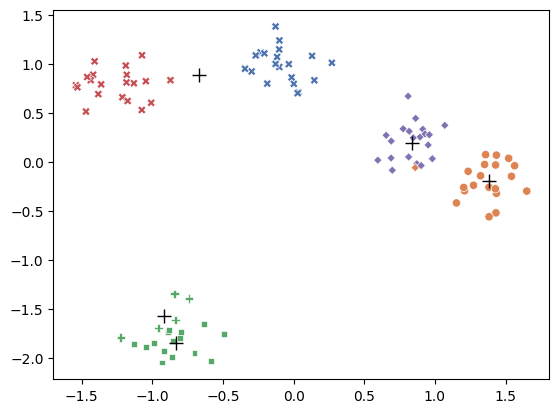

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random

# Define a function to calculate Euclidean distance between a point and a set of data points


def euclidean(point, data):
    """
    Euclidean distance between point & data.  
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))

# Define a class for the KMeans clustering algorithm


class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters  # Number of clusters to form
        self.max_iter = max_iter  # Maximum number of iterations

    def fit(self, X_train):
        # Initialize the centroids using the "k-means++" method

        # Choose the first centroid randomly from the training data
        self.centroids = [random.choice(X_train)]

        # Choose the remaining centroids based on distances from existing centroids
        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            dists = np.sum([euclidean(centroid, X_train)
                           for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose the next centroid based on their distances
            new_centroid_idx, = np.random.choice(
                range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]

        iteration = 0
        prev_centroids = None
        # Continue iterating until convergence or maximum iterations are reached
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Assign each datapoint to the nearest centroid

            # Initialize an empty list for each cluster
            sorted_points = [[] for _ in range(self.n_clusters)]

            # Assign each data point to the nearest centroid
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)

            # Store the current centroids and calculate new centroids as the mean of assigned points
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0)
                              for cluster in sorted_points]

            # Handle cases where a centroid has no assigned points (avoid NaN values)
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():
                    self.centroids[i] = prev_centroids[i]

            iteration += 1

    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        # Assign each data point to the nearest centroid

        # Find the nearest centroid for each data point and store the centroid and its index
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs


# Create a dataset of 2D distributions
centers = 5
X_train, true_labels = make_blobs(
    n_samples=100, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)

# Fit centroids to the dataset using KMeans
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)

# Evaluate the results and assign each data point to a cluster
class_centers, classification = kmeans.evaluate(X_train)

# Visualize the data points and centroids
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         'k+',
         markersize=10,
         )
plt.show()
